In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

import psutil
n_jobs_count = int(psutil.cpu_count(logical=False) / 2) + 1 # TO use 75% of CPU cores. 

import joblib

# Exploratory Data Analysis

## Load dataset and preprocessing

In [2]:
# Loading dataset
df = pd.read_csv('./dataset.csv')
df.head() 

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.shape

(11055, 32)

In [4]:
# Unique values for each columns
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [5]:
df['Result'].unique()

array([-1,  1], dtype=int64)

In [6]:
# -1 -> Phishing
#  1 -> Legitimate

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

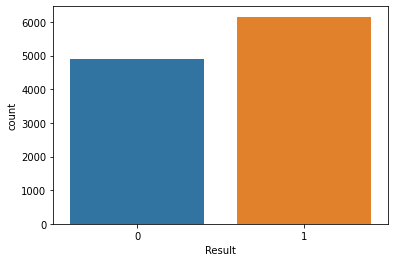

In [7]:
# Replacing -1 with 0 
df['Result']=df['Result'].replace(-1,0)
sns.countplot(df['Result'])

## Splitting into training and testing

In [8]:
X=df.drop(columns='Result')
Y=df['Result']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)
train_X.shape, test_X.shape

((7738, 31), (3317, 31))

## Feature selection

In [9]:
train_X.corr()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
index,1.000000,-0.390658,0.009277,-0.009069,-0.172325,-0.006087,-0.000337,0.237540,0.002826,-0.001932,...,-0.012959,-0.009451,-0.008846,0.106646,0.400344,-0.013478,0.072277,-0.014222,0.017389,0.145937
having_IPhaving_IP_Address,-0.390658,1.000000,-0.058326,0.405227,0.161919,0.396153,-0.002733,-0.079341,0.060664,-0.030111,...,0.048414,0.101872,0.063174,-0.011974,-0.050533,-0.003747,-0.096963,0.037268,-0.336723,-0.011167
URLURL_Length,0.009277,-0.058326,1.000000,-0.099335,-0.067711,-0.076392,0.060963,0.004693,0.055445,-0.227047,...,-0.017578,-0.051743,-0.018184,0.177277,-0.043152,0.014743,0.185156,0.003543,-0.019843,-0.078993
Shortining_Service,-0.009069,0.405227,-0.099335,1.000000,0.107584,0.841405,-0.083999,-0.045604,-0.068638,0.059861,...,0.040398,0.027423,0.011200,-0.053782,0.436141,-0.050836,0.012897,0.172989,-0.198953,0.075934
having_At_Symbol,-0.172325,0.161919,-0.067711,0.107584,1.000000,0.083466,-0.015027,-0.054652,0.021706,0.013855,...,0.233961,0.297941,0.293082,0.000602,-0.049078,0.020658,-0.056309,0.043265,-0.015162,-0.072276
double_slash_redirecting,-0.006087,0.396153,-0.076392,0.841405,0.083466,1.000000,-0.091124,-0.051933,-0.044812,0.047453,...,0.026715,0.043909,0.003543,-0.052876,0.432414,-0.060387,-0.005098,0.195088,-0.197301,0.061847
Prefix_Suffix,-0.000337,-0.002733,0.060963,-0.083999,-0.015027,-0.091124,1.000000,0.081474,0.259732,-0.104787,...,-0.025882,-0.019604,-0.035924,0.081199,-0.025683,0.112077,-0.004811,0.070038,0.064584,0.001813
having_Sub_Domain,0.237540,-0.079341,0.004693,-0.045604,-0.054652,-0.051933,0.081474,1.000000,0.270421,-0.082783,...,0.011810,-0.039289,-0.001274,0.115116,0.121289,-0.018020,0.122883,0.046069,-0.000157,0.078257
SSLfinal_State,0.002826,0.060664,0.055445,-0.068638,0.021706,-0.044812,0.259732,0.270421,1.000000,-0.199225,...,0.013138,-0.018248,-0.006938,0.158053,0.053596,0.255674,0.080527,0.096544,-0.012652,0.074990
Domain_registeration_length,-0.001932,-0.030111,-0.227047,0.059861,0.013855,0.047453,-0.104787,-0.082783,-0.199225,1.000000,...,0.019717,0.054086,0.001345,-0.060853,-0.012233,-0.137430,-0.060446,-0.043576,0.124625,-0.008331


## Correlation Heatmap

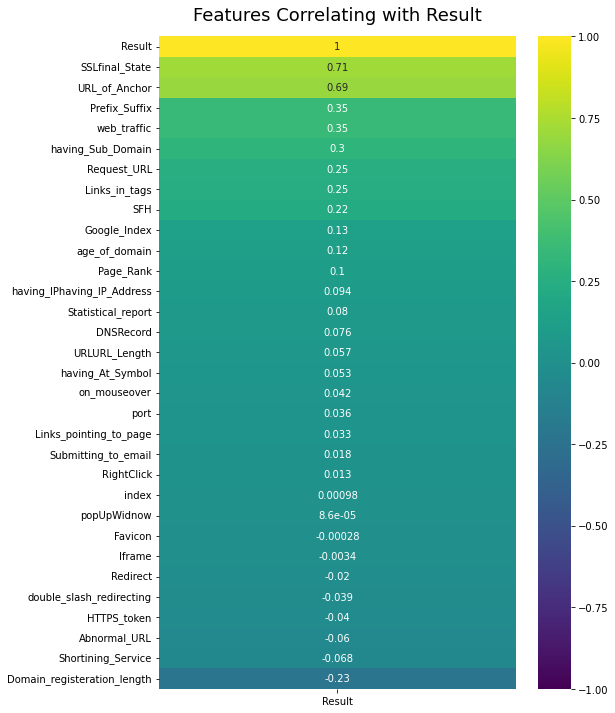

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('CorrelationWithOnlyResult.png', format='png', dpi=100)

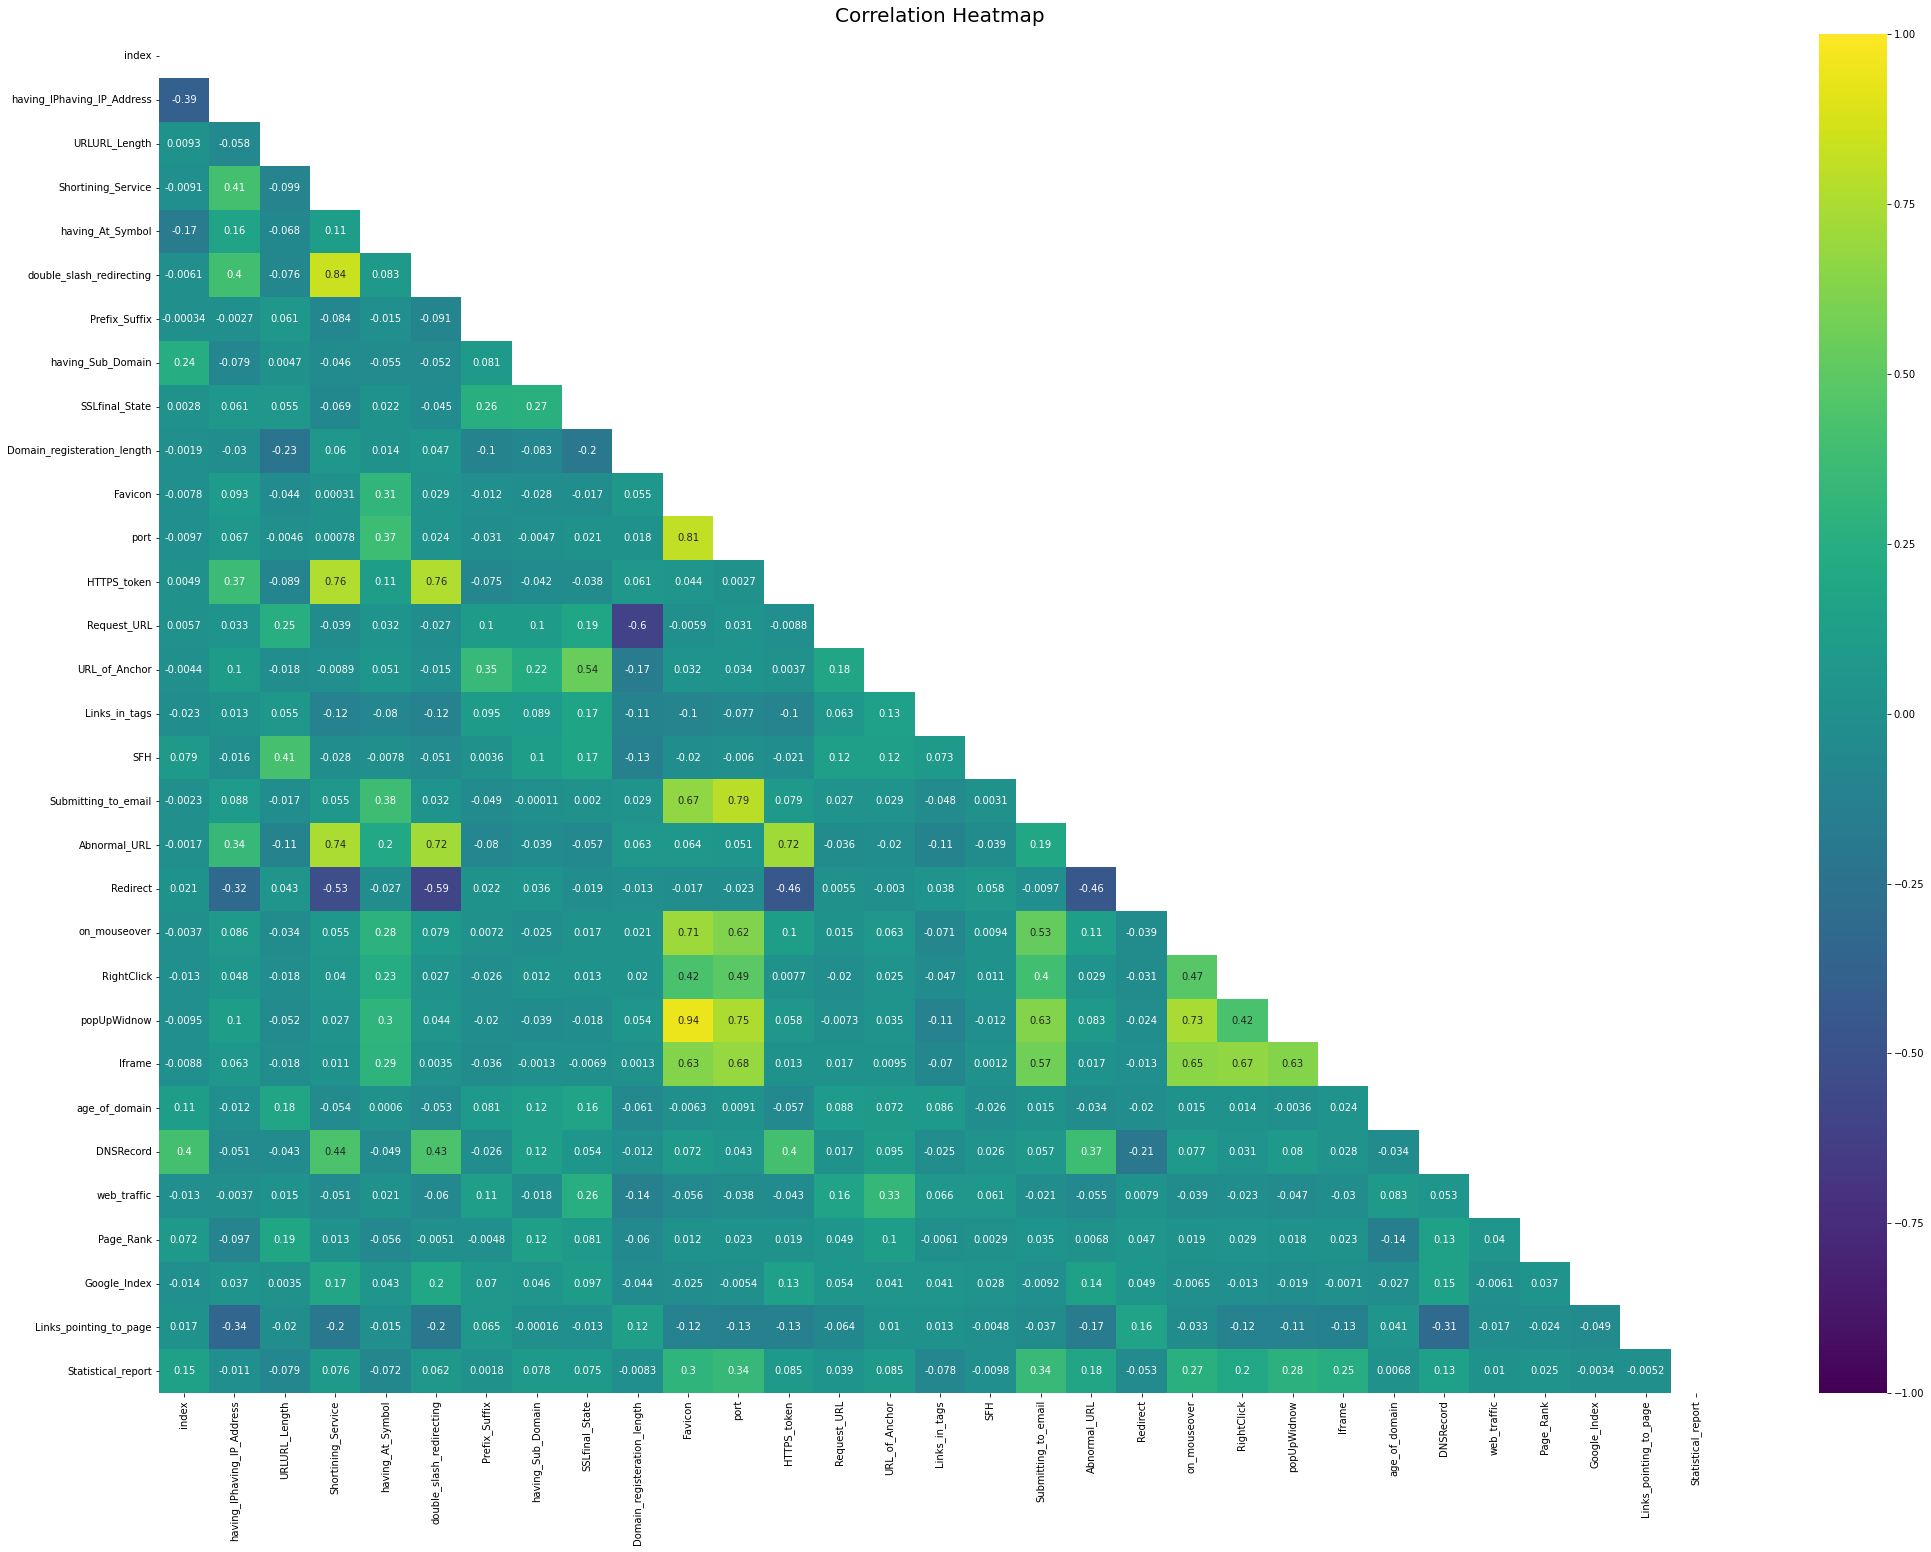

In [11]:
# Using Pearson Correlation
plt.figure(figsize=(35, 25))
corr = train_X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
# plt.savefig('CorrelationHeatmap.png', format='png', dpi=300)
plt.show()

In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
  col_corr = list() # List of all the names of deleted columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if abs(corr_matrix.iloc[i, j]) >= threshold and (corr_matrix.columns[j] not in col_corr):
              colname = corr_matrix.columns[i] # getting the name of column
              col_corr.append(colname)
  return col_corr

In [13]:
corr_features = correlation(train_X, 0.9)
len(corr_features)

1

In [14]:
corr_features

['popUpWidnow']

In [15]:
train_X = train_X.drop(columns=['Favicon', 'index'],axis=1)
test_X = test_X.drop(columns=['Favicon', 'index'],axis=1)
train_X.columns, len(train_X.columns), test_X.columns, len(test_X.columns)

(Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
        'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
        'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
        'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags',
        'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect',
        'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
        'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
        'Links_pointing_to_page', 'Statistical_report'],
       dtype='object'),
 29,
 Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
        'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
        'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
        'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags',
        'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect',
        'on_mouseover

# Model Building

## 1) Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr=LogisticRegression(max_iter=800)
lr.fit(train_X,train_Y)
lr_pred=lr.predict(test_X)
accuracy_score(lr_pred,test_Y)

0.9255351220982816

In [17]:
lr=LogisticRegression()

In [18]:
param_grid = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [500, 600, 700, 800, 900, 1000, 1500, 2500, 5000]
}
clf = RandomizedSearchCV(lr, param_distributions = param_grid, cv = 3, verbose=True, random_state=5, n_jobs=n_jobs_count)
best_clf = clf.fit(train_X,train_Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [19]:
best_clf.best_params_

{'solver': 'liblinear', 'max_iter': 1000, 'C': 545.5594781168514}

In [18]:
lr=LogisticRegression(solver='liblinear', max_iter=1000, C=545.5594781168514)
lr.fit(train_X,train_Y)
lr_pred=lr.predict(test_X)
lr_accu = accuracy_score(lr_pred,test_Y)
lr_accu

0.9249321676213446

## 2) KNeighbors Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn_pred=knn.predict(test_X)
accuracy_score(knn_pred,test_Y)

0.9463370515526078

In [21]:
knn = KNeighborsClassifier()

In [24]:
knn_param_grid = {
    "n_neighbors": [2, 3, 5, 7, 9, 15],
    "metric": ['euclidean', 'manhattan']
}
clf = RandomizedSearchCV(knn, param_distributions = knn_param_grid, cv = 3, verbose=True, n_jobs=n_jobs_count)
best_clf = clf.fit(train_X,train_Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [25]:
best_clf.best_params_

{'n_neighbors': 3, 'metric': 'manhattan'}

In [22]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(train_X,train_Y)
knn_pred=knn.predict(test_X)
knn_accu = accuracy_score(knn_pred,test_Y)
knn_accu

0.9562858004220681

## 3) Naive Bayes classifier

In [23]:
from sklearn.naive_bayes import BernoulliNB

In [24]:
nb = BernoulliNB()
nb.fit(train_X,train_Y)
nb_pred=nb.predict(test_X)
accuracy_score(nb_pred,test_Y)

0.9035272836900814

In [25]:
nb = BernoulliNB()

In [30]:
nb_param_grid = {
    'alpha': [0.01, 0.08, 0.09, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 1.0, 10.0],
}
clf = RandomizedSearchCV(nb, param_distributions = nb_param_grid, cv=5, verbose=5, n_jobs=n_jobs_count)
best_clf = clf.fit(train_X,train_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [31]:
best_clf.best_params_

{'alpha': 0.15}

In [26]:
nb = BernoulliNB(alpha=0.15)
nb.fit(train_X,train_Y)
nb_pred=nb.predict(test_X)
nb_accu = accuracy_score(nb_pred,test_Y)
nb_accu

0.9035272836900814

## 4) Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
raw_rf = RandomForestClassifier(max_depth=10, random_state=0)
raw_rf.fit(train_X,train_Y)
raw_rf_pred=raw_rf.predict(test_X)
accuracy_score(raw_rf_pred,test_Y)

0.9517636418450407

In [30]:
rf = RandomForestClassifier()

In [36]:
%%time
rf_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [20, 30, 40, 50, 60, 70, 80, 90],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
clf = RandomizedSearchCV(rf, param_distributions = rf_param_grid, n_iter = 100, cv = 3, refit=True, verbose=10, random_state=5, n_jobs=n_jobs_count)
best_clf = clf.fit(train_X,train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: total: 4.33 s
Wall time: 7min 24s


In [37]:
best_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [20]:
rf = RandomForestClassifier(bootstrap=False,max_depth=50,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=1000,random_state=5)
rf.fit(train_X,train_Y)
rf_pred=rf.predict(test_X)
rf_accu = accuracy_score(rf_pred,test_Y)
rf_accu

0.9731685257763039

### Dumping Random Forest Model.

In [26]:
# save
joblib.dump(rf, "./random_forest.pkl")

['./random_forest.pkl']

In [27]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./random_forest.pkl")
loaded_rf_pred = loaded_rf.predict(test_X)
loaded_rf_accu = accuracy_score(loaded_rf_pred, test_Y)
loaded_rf_accu

0.9731685257763039

## 5) Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC

In [32]:
model=SVC()
model.fit(train_X,train_Y)
svm_pred = model.predict(test_X)
accuracy_score(svm_pred,test_Y)

0.9463370515526078

In [33]:
svm_clf = SVC()

In [42]:
%%time
svm_param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear']
} 
clf = RandomizedSearchCV(svm_clf, param_distributions=svm_param_grid, refit=True, verbose=10, n_jobs=n_jobs_count)
best_clf = clf.fit(train_X,train_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 781 ms
Wall time: 7min 33s


In [43]:
best_clf.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [34]:
svm_clf =SVC(C=10, gamma=0.01, kernel='rbf')
svm_clf.fit(train_X,train_Y)
svm_pred=svm_clf.predict(test_X)
svm_accu = accuracy_score(svm_pred,test_Y)
svm_accu

0.9439252336448598

# Performance Evaluation

In [35]:
modelName = ("Logistic Regression", "KNeighbors Classifier", "Bernoulli Naive Bayes", "Random Forest", "Support Vector Machine")
models = (lr_pred, knn_pred, nb_pred, rf_pred, svm_pred)
accuracy = (lr_accu, knn_accu, nb_accu, rf_accu, svm_accu)
comparisionDf = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Recall', 'False Positive Rate'])

for i in range(len(models)):
    row = []
    matrix = confusion_matrix(test_Y, models[i])
    print(str(i + 1) + ") " + modelName[i] + ":\n", matrix)
    tn, fp, fn, tp = matrix.ravel()
    row.append(modelName[i])
    row.append(round(accuracy[i] * 100, 2))
    row.append(round((tp/(tp+fn)) * 100, 2))
    row.append(round((fp/(fp+tn)) * 100, 2))
    comparisionDf.loc[i] = row
comparisionDf

1) Logistic Regression:
 [[1323  137]
 [ 112 1745]]
2) KNeighbors Classifier:
 [[1386   74]
 [  71 1786]]
3) Bernoulli Naive Bayes:
 [[1311  149]
 [ 171 1686]]
4) Random Forest:
 [[1409   51]
 [  38 1819]]
5) Support Vector Machine:
 [[1350  110]
 [  76 1781]]


,Classification Model,Accuracy,Recall,False Positive Rate
0,Logistic Regression,92.49,93.97,9.38
1,KNeighbors Classifier,95.63,96.18,5.07
2,Bernoulli Naive Bayes,90.35,90.79,10.21
3,Random Forest,97.32,97.95,3.49
4,Support Vector Machine,94.39,95.91,7.53
